<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   02.11.2022
* Name: Tobias Esser
* matriculation number: 11134729

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [2]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

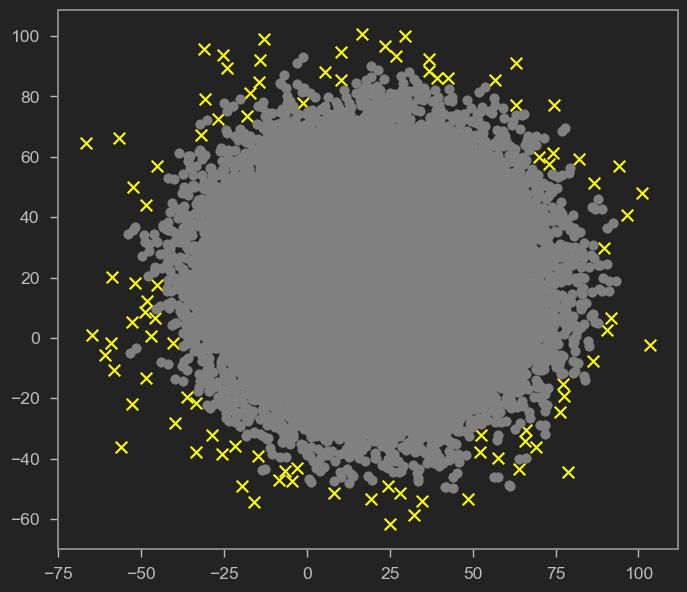

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
plt.scatter(random_data[clusters==-1, 0], random_data[clusters==-1, 1], c='yellow', s=70, marker='x')
plt.scatter(random_data[clusters!=-1, 0], random_data[clusters!=-1, 1], c='gray', s=50)

## Loans income

In [4]:
import pandas as pd

In [5]:
df1 = pd.read_csv('data/loans_income.csv')
data1 = df1['x'].to_numpy().reshape(-1, 1)

In [6]:
print(data1.shape)

(50000, 1)


This <a href="https://www.section.io/engineering-education/dbscan-clustering-in-python/">article</a> also talks about using KNN (K-Nearest Neighbors) to calculate the EPS-value, therefore i use their code to create the graph and read the eps value .
To determine the best epsilon value, we calculate the average distance between each point and its closest/nearest neighbors. We then plot a k-distance and choose the epsilon value at the “elbow” of the graph. On the y-axis, we plot the average distances and the x-axis all the data points in your dataset.

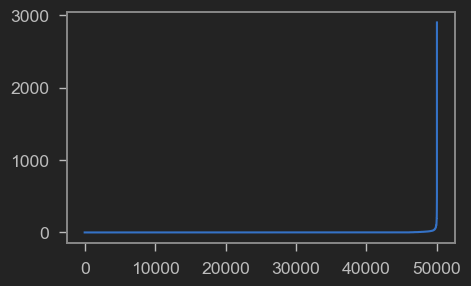

In [7]:
from sklearn.neighbors import NearestNeighbors # importing the library
import matplotlib.pyplot as plt
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data1) # fitting the data to the object
distances,indices=nbrs.kneighbors(data1) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

As the plot does not show us any information about the min of epsilon, we take the minimum amount, which is 1.

In [8]:
# hyperparameters
minPts = 4
eps = 1

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data1)

list(clusters).count(-1)

5323

The amount of clusters are high.

## SOCR Height Weight

In [9]:
df2 = pd.read_csv('data/SOCR-HeightWeight.csv')
height = df2['Height(Inches)']
weight = df2['Weight(Pounds)']
data2 = np.vstack((height, weight)).T

In [10]:
print(data2.shape)

(25000, 2)


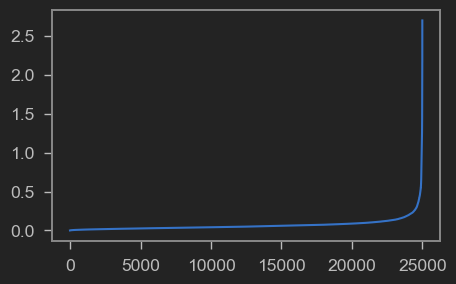

In [11]:
from sklearn.neighbors import NearestNeighbors # importing the library
import matplotlib.pyplot as plt
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data2) # fitting the data to the object
distances,indices=nbrs.kneighbors(data2) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

As the plot does not show us any information about the min of epsilon, we take the minimum amount, which is 1.

In [12]:
# hyperparameters
minPts = 4
eps = 1

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data2)

list(clusters).count(-1)

60

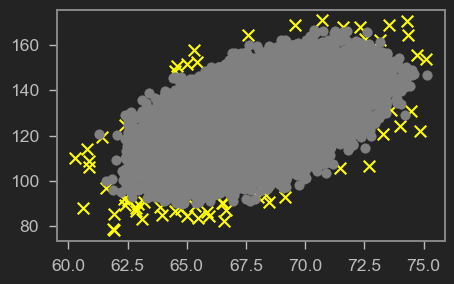

In [13]:
plt.scatter(data2[clusters==-1, 0], data2[clusters==-1, 1], c='yellow', s=70, marker='x')
plt.scatter(data2[clusters!=-1, 0], data2[clusters!=-1, 1], c='gray', s=50)

## Student female height

In [18]:
df3 = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")
height2 = df3[df3['gender'] == 'Female']["height"]
score = df3[df3['gender'] == 'Female']["nc.score"]
data3 = np.vstack((height2, score)).T


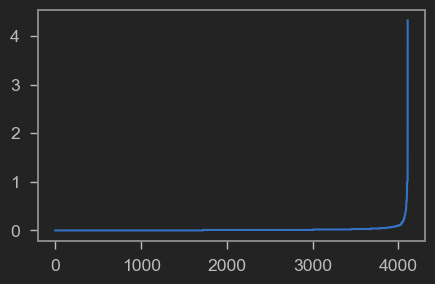

In [19]:
from sklearn.neighbors import NearestNeighbors # importing the library
import matplotlib.pyplot as plt
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data3) # fitting the data to the object
distances,indices=nbrs.kneighbors(data3) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [20]:
# hyperparameters
minPts = 4
eps = 1

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data3)

list(clusters).count(-1)

25

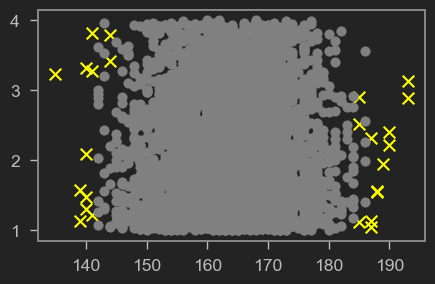

In [21]:
plt.scatter(data3[clusters==-1, 0], data3[clusters==-1, 1], c='yellow', s=70, marker='x')
plt.scatter(data3[clusters!=-1, 0], data3[clusters!=-1, 1], c='gray', s=50)